# Imports 

In [182]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.pipeline
import sklearn.preprocessing
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.utils import shuffle
import sklearn.neighbors
from scipy.spatial import Voronoi, voronoi_plot_2d

# Get data from url

In [183]:
urlmat = 'https://raw.githubusercontent.com/carolinasofia/studentdata/master/student-mat.csv'
dfmat = pd.read_csv(urlmat)

urlpor = 'https://raw.githubusercontent.com/carolinasofia/studentdata/master/student-por.csv'
dfpor = pd.read_csv(urlpor)

#dataset with numbers for each categorical variable
urlporbin = 'https://raw.githubusercontent.com/carolinasofia/studentdata/master/student-por-binary.csv'
dfporbin = pd.read_csv(urlporbin)
dfporbin = shuffle(dfporbin)

# Function for a scatter plot

In [184]:
#function to make a scatter plot
def scatter_plot(feature,target):
    plt.figure(figsize=(16,8))
    plt.scatter(
        feature,
        target,
        c='black')
    plt.show()

#  Ploting grades G3 against romantic relationships

Bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


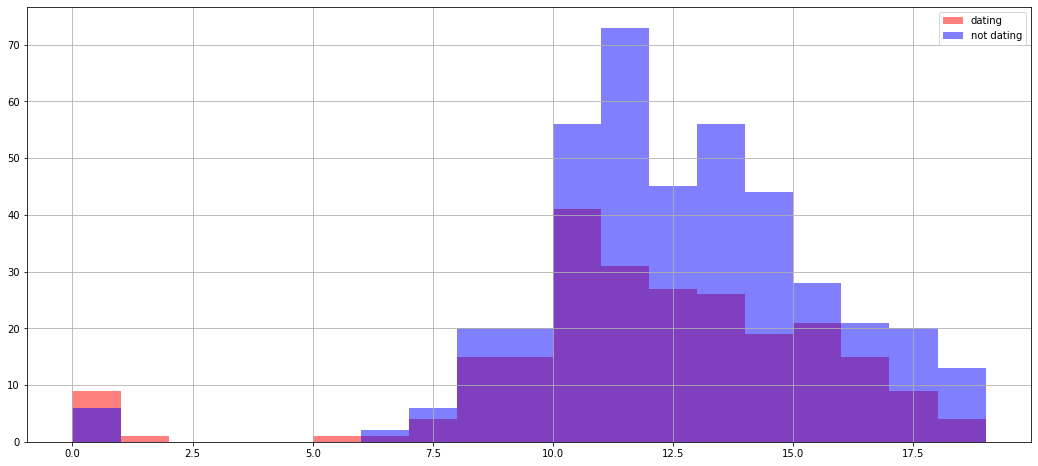

In [185]:
bins = np.arange(0, 20, 1)
print("Bins:", bins)

ax = dfpor.loc[dfpor.romantic == "yes", "G3"].hist(bins=bins, color="red", alpha=0.5, label="dating", figsize=(18, 8))
dfpor.loc[dfpor.romantic == "no", "G3"].hist(bins=bins, color="blue", ax=ax, alpha=0.5, label="not dating")
ax.legend();

# Splitting data into train vs test

In [205]:
msk = np.random.rand(len(dfporbin)) < 0.75
train = dfporbin[msk]
test = dfporbin[~msk]
print(len(test))
print(len(train))

153
496


# Model using extra educational support, mothers and fathers education and G2 grades to predict G3 grades

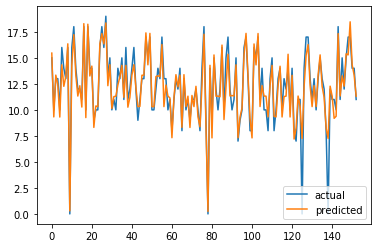

0.8744741980972257


In [206]:
train1 = train[['schoolsup','Medu','Fedu','G2','G3']]
test1 = test[['schoolsup','Medu','Fedu','G2','G3']]
x_train = train1.values[ :, :4]
y_train = train1.values[ :, 4:]
x_test = test1.values[ :, :4]
y_test = test1.values[ :, 4:]
r1 = LinearRegression().fit(x_train, y_train)
y1 = r1.predict(x_test)
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y1), label = 'predicted')
plt.legend()
plt.show()
print(r1.score(x_test, y_test))

## same + lasso 

[-0.01666513 -0.03121693  0.03783289  1.00163711]


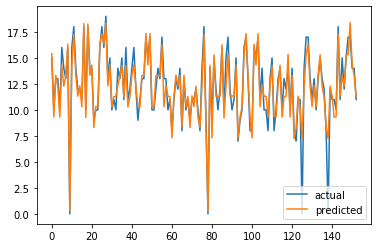

0.8743609738006024


In [207]:
r2 = linear_model.Lasso(alpha=0.01)
r2.fit(x_train,y_train)
print(r2.coef_)
y2 = r2.predict(x_test)
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y2), label = 'predicted')
plt.legend()
plt.show()
print(r2.score(x_test, y_test))

## Models ALL data WITH train vs test

[[-0.117507   -0.06974823  0.01689255  0.09197741  0.08602124 -0.06187793
   0.02822657 -0.05811841 -0.01376826 -0.06379143 -0.02308416  0.05770905
   0.13914858  0.05688104 -0.285624   -0.14990414  0.16184086 -0.32194012
   0.15138932 -0.18288474  0.25115481  0.11877543 -0.04856207 -0.0531712
  -0.00681244 -0.0583137  -0.11043263 -0.01005173 -0.04585604  0.02369787
   0.12551396  0.85124155]]


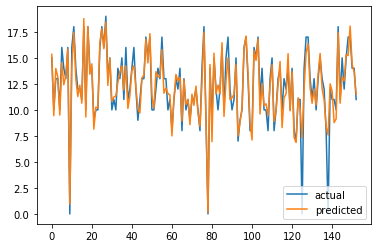

0.8691855166570479


In [208]:
x_train = train.values[ :, :32]
y_train = train.values[ :, 32:]
x_test = test.values[ :, :32]
y_test = test.values[ :, 32:]
r4 = LinearRegression().fit(x_train, y_train)
print(r4.coef_)
y4 = r4.predict(x_test)
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y4), label = 'predicted')
plt.legend()
plt.show()
print(r4.score(x_test, y_test))

### same + lasso

[-4.47422772e-02 -1.36884896e-02  1.62806236e-05  5.35097717e-02
  3.66268851e-02 -3.70112262e-02  9.83734057e-03 -0.00000000e+00
 -6.67188124e-03 -5.09207491e-02 -2.85154471e-02  3.43100141e-02
  1.08801845e-01  5.57762680e-02 -2.66984181e-01 -0.00000000e+00
  1.16576302e-01 -9.75036120e-02  8.36645034e-02 -1.09125663e-01
  1.10115694e-01  5.35810567e-02 -0.00000000e+00 -5.12929728e-02
 -0.00000000e+00 -5.37628091e-02 -1.04752002e-01 -8.47839621e-03
 -4.28645421e-02  2.77610646e-02  1.36418807e-01  8.55310590e-01]


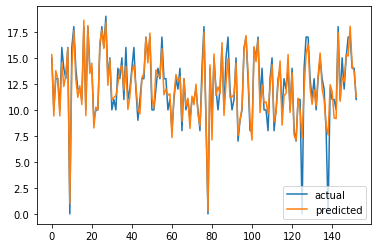

0.869598254765197


In [209]:
#print(train.columns)
x_train = train.values[ :, :32]
y_train = train.values[ :, 32:]
x_test = test.values[ :, :32]
y_test = test.values[ :, 32:]
r5 = linear_model.Lasso(alpha=0.01)
r5.fit(x_train,y_train)
print(r5.coef_)
#print(r5.intercept_)
y5 = r5.predict(x_test)
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y5), label = 'predicted')
plt.legend()
plt.show()
print(r5.score(x_test, y_test))

# Model using ONLY grades. How G1,G2 affect G3

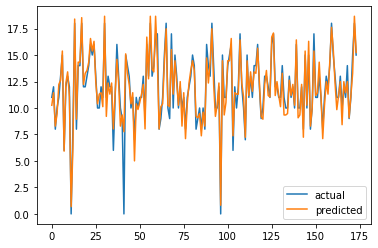

0.8975860397988702


In [210]:
df1 = dfporbin[['G1','G2','G3']]

tt = np.random.rand(len(df1)) < 0.75
train = df1[tt]
test = df1[~tt]

x_train = train.values[ :, :2]
y_train = train.values[ :, 2:]
x_test = test.values[ :, :2]
y_test = test.values[ :, 2:]
r6 = LinearRegression().fit(x_train, y_train)
y6 = r6.predict(x_test)
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y6), label = 'predicted')
plt.legend()
plt.show()
print(r6.score(x_test, y_test))

## same + lasso

[0.12285224 0.91364374]
0.8977488102557403


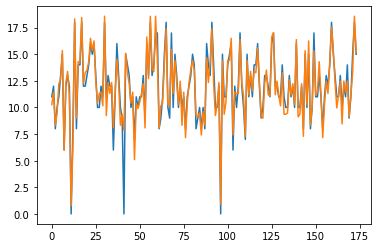

In [211]:
x_train = train.values[ :, :2]
y_train = train.values[ :, 2:]
x_test = test.values[ :, :2]
y_test = test.values[ :, 2:]
r7 = linear_model.Lasso(alpha=0.1)
r7.fit(x_train,y_train)
print(r7.coef_)
#print(clf.intercept_)
y7 = r7.predict(x_test)
plt.plot(y_test)
plt.plot(y7)
print(r7.score(x_test, y_test))

## Comparing the two algorithms 

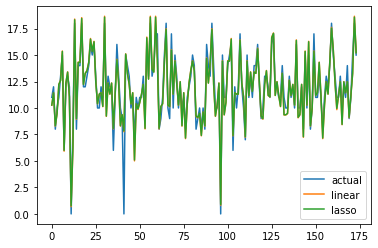

0.8975860397988702
0.8977488102557403


In [212]:
plt.plot(list(y_test), label = 'actual')
plt.plot(list(y6), label = 'linear')
plt.plot(list(y7), label = 'lasso')
plt.legend()
plt.show()
print(r6.score(x_test,y_test))
print(r7.score(x_test,y_test))#with lasso

# Joining grade data for maths and portuguese

In [213]:
##please note that this data hasnt been properly achieved

dfm1 = dfmat[['G1','G2','G3']]
dfp1 = dfpor[['G1','G2','G3']]
dfp1 = dfp1.rename(columns={"G1": "GP1", "G2": "GP2", 'G3':'GP3'})
dfmp = pd.concat([dfm1,dfp1], axis=1, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
##drop NaN rows
dfmp=dfmp.dropna()
dfmp

,G1,G2,G3,GP1,GP2,GP3
0,5.0,6.0,6.0,0,11,11
1,5.0,5.0,6.0,9,11,11
2,7.0,8.0,10.0,12,13,12
3,15.0,14.0,15.0,14,14,14
4,6.0,10.0,10.0,11,13,13
...,...,...,...,...,...,...
390,9.0,9.0,9.0,14,13,14
391,14.0,16.0,16.0,11,13,14
392,10.0,8.0,7.0,12,13,15
393,11.0,12.0,10.0,14,14,15


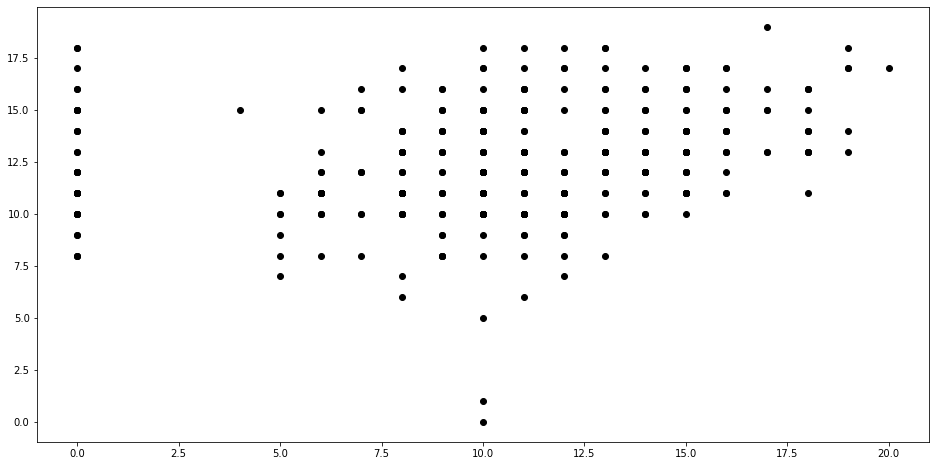

In [214]:
scatter_plot(dfmp['G3'],dfmp['GP3'])

In [215]:
#removes 40 students who got 0 in their final
    #counting them as missing values
dfmp = dfmp.loc[dfmp['G3']!=0]
dfmp

,G1,G2,G3,GP1,GP2,GP3
0,5.0,6.0,6.0,0,11,11
1,5.0,5.0,6.0,9,11,11
2,7.0,8.0,10.0,12,13,12
3,15.0,14.0,15.0,14,14,14
4,6.0,10.0,10.0,11,13,13
...,...,...,...,...,...,...
390,9.0,9.0,9.0,14,13,14
391,14.0,16.0,16.0,11,13,14
392,10.0,8.0,7.0,12,13,15
393,11.0,12.0,10.0,14,14,15


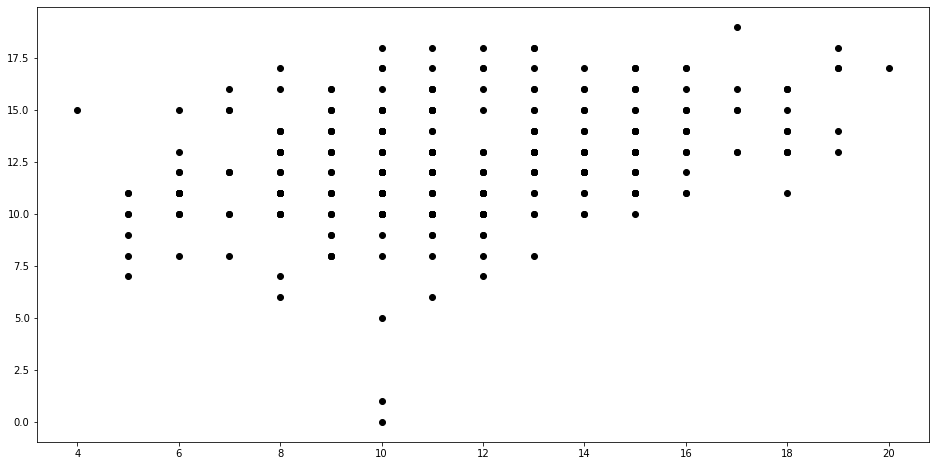

In [216]:
scatter_plot(dfmp['G3'],dfmp['GP3'])

[0.01761349 0.01254774 0.         0.04741924 0.90531159]
0.6687565866825738


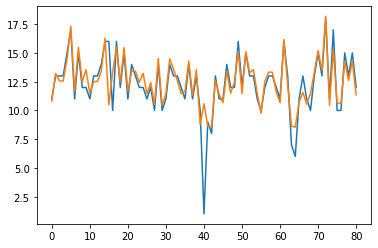

In [217]:
tt1 = np.random.rand(len(dfmp)) < 0.75
train = dfmp[tt1]
test = dfmp[~tt1]

x_train = train.values[ :, :5]
y_train = train.values[ :, 5:]
x_test = test.values[ :, :5]
y_test = test.values[ :, 5:]
r8 = linear_model.Lasso(alpha=0.1)
r8.fit(x_train,y_train)
print(r8.coef_)
#print(clf.intercept_)
y8 = r8.predict(x_test)
plt.plot(y_test)
plt.plot(y8)
print(r8.score(x_test, y_test))